# Analysis of crime data in Boston
## By Royce Schultz

This dataset can be found on [Kaggle](https://www.kaggle.com/AnalyzeBoston/crimes-in-boston).


In [39]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import random

crime_data = pd.read_csv('crime.csv', encoding="ISO-8859-1")
off_codes_data = pd.read_csv('offense_codes.csv', encoding='ISO-8859-1')

crime_data.head(10)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
5,I182070936,3820,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,C11,398,NaN,2018-09-03 21:09:00,2018,9,Monday,21,Part Three,TALBOT AVE,42.290196,-71.071590,"(42.29019621, -71.07159012)"
6,I182070933,724,Auto Theft,AUTO THEFT,B2,330,NaN,2018-09-03 21:25:00,2018,9,Monday,21,Part One,NORMANDY ST,42.306072,-71.082733,"(42.30607218, -71.08273260)"
7,I182070932,3301,Verbal Disputes,VERBAL DISPUTE,B2,584,NaN,2018-09-03 20:39:37,2018,9,Monday,20,Part Three,LAWN ST,42.327016,-71.105551,"(42.32701648, -71.10555088)"
8,I182070931,301,Robbery,ROBBERY - STREET,C6,177,NaN,2018-09-03 20:48:00,2018,9,Monday,20,Part One,MASSACHUSETTS AVE,42.331521,-71.070853,"(42.33152148, -71.07085307)"
9,I182070929,3301,Verbal Disputes,VERBAL DISPUTE,C11,364,NaN,2018-09-03 20:38:00,2018,9,Monday,20,Part Three,LESLIE ST,42.295147,-71.058608,"(42.29514664, -71.05860832)"


<Figure size 432x288 with 0 Axes>

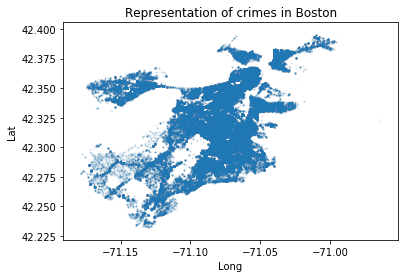

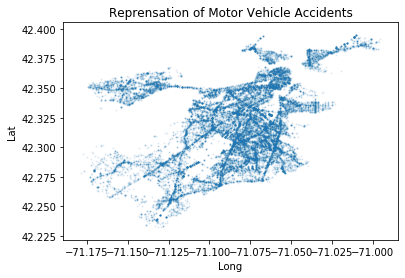

<Figure size 432x288 with 0 Axes>

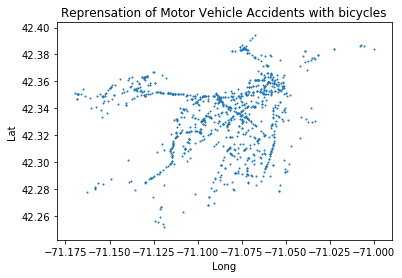

In [42]:
crime_data.Lat.replace(-1, None, inplace=True) #Coordonates cleaning
crime_data.Long.replace(-1, None, inplace=True)

f1=plt.figure(1) # Figure of all crimes
crime_data.plot(kind="scatter", x="Long", y="Lat", alpha=0.05, s=1)
plt.title('Representation of crimes in Boston')

f2=plt.figure(2) # Figure of vehicle crimes
vehicle_crimes=crime_data.loc[crime_data.OFFENSE_CODE_GROUP=='Motor Vehicle Accident Response']
vehicle_crimes.plot(kind="scatter", x="Long", y="Lat",alpha=0.1, s=1)
plt.title('Reprensation of Motor Vehicle Accidents')
plt.show()

f2=plt.figure(3) # Figure of vehicle crimes involving a bicycle
bicycle_crimes=vehicle_crimes.loc[vehicle_crimes.OFFENSE_CODE.isin([3811,3810])]
bicycle_crimes.plot(kind="scatter", x="Long", y="Lat",alpha=1, s=1)
plt.title('Reprensation of Motor Vehicle Accidents with bicycles')
plt.show()

86b5d8
#27a5d4
#77ad77
#d272e0
#908eaf
#1f2c73
#66eca5
#ffcf8f
#763153
#d81c39
#623486
#718931
#2fa0a8
B2     49945
C11    42530
D4     41915
A1     35717
B3     35442
C6     23460
D14    20127
E13    17536
E18    17348
A7     13544
E5     13239
A15     6505
Name: DISTRICT, dtype: int64


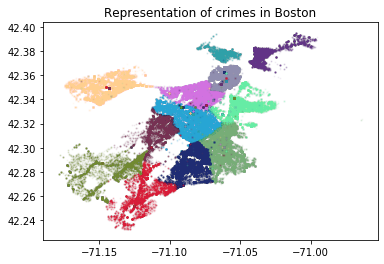

In [60]:
f1=plt.figure(1) #Plot disctricts

districts = []
for district in crime_data.DISTRICT.value_counts().keys():
    districts.append( crime_data.loc[crime_data.DISTRICT.isin([district])] )
    
for district in districts:
    color = "%06x" % random.randint(0, 0xFFFFFF) # Generate random color
    color = '#'+color
    print(color)
    plt.scatter(district.Long.values, district.Lat.values, s=1, c=color, alpha = 0.05)

plt.title('Representation of crimes in Boston')

x = crime_data.DISTRICT.value_counts()
print(x)

5304.571428571428


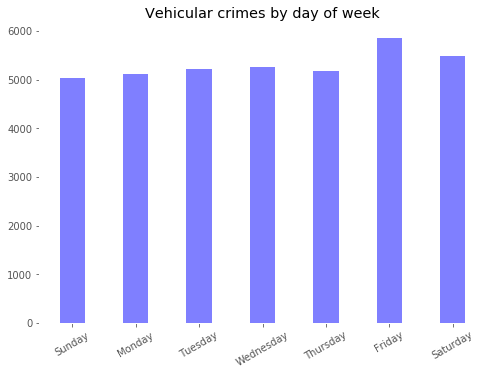

In [116]:
dow_set = vehicle_crimes.DAY_OF_WEEK.value_counts()

cats = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
dow_set = dow_set.reindex(index=cats)

fig, ax = plt.subplots(figsize=(8, 5.5))
y_pos = np.arange(len(dow_set))
plt.bar(y_pos, dow_set.values, color='b', align='center', alpha=0.5, width= 0.4)
plt.xticks(y_pos, dow_set.keys(), rotation=30)
plt.title('Vehicular crimes by day of week')
plt.grid()
ax.set_facecolor('w')

print(dow_set.mean())

### Vehicle accidents are most common on Fridays and Saturdays

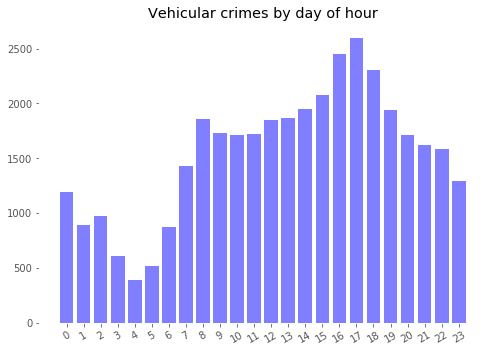

In [61]:
dow_set = vehicle_crimes.HOUR.value_counts()

y_pos = np.arange(len(dow_set))
dow_set = dow_set.reindex(index=y_pos)

fig, ax = plt.subplots(figsize=(8, 5.5))
plt.bar(y_pos, dow_set.values, color='b', align='center', alpha=0.5)
plt.xticks(y_pos, dow_set.keys(), rotation=30)
plt.title('Vehicular crimes by day of hour')
plt.grid()
ax.set_facecolor('w')

### Vehicle accidents spike in the early morning (8AM), but are most common in the evenings (1600-1800)

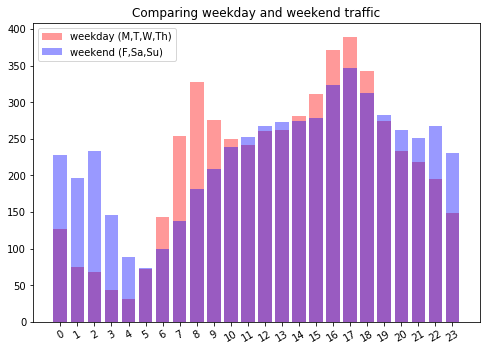

In [27]:
weekdays = vehicle_crimes.loc[vehicle_crimes.DAY_OF_WEEK.isin([ 'Monday', 'Tuesday', 'Wednesday', 'Thursday'])]
weekends = vehicle_crimes.loc[vehicle_crimes.DAY_OF_WEEK.isin(['Friday', 'Saturday','Sunday'])]

weekday_hours = weekdays.HOUR.value_counts() # count accidents for each hour
weekend_hours = weekends.HOUR.value_counts()

weekday_hours = weekday_hours/4 # normalize
weekend_hours = weekend_hours/3

y_pos = np.arange(len(weekday_hours)) # reindex
weekday_hours = weekday_hours.reindex(index=y_pos)
weekend_hours = weekend_hours.reindex(index=y_pos)

fig, ax = plt.subplots(figsize=(8, 5.5)) # plot
plt.bar(y_pos, weekday_hours.values, color='r', align='center', alpha=0.4) # plot weekdays
plt.bar(y_pos, weekend_hours, color='b', align='center', alpha=0.4) # plot weekends
plt.xticks(y_pos, weekday_hours.keys(), rotation=30)
plt.legend(['weekday (M,T,W,Th)','weekend (F,Sa,Su)'])
plt.title('Comparing weekday and weekend traffic')
ax.set_facecolor('w')

### Rush hour traffic is real

### Accidents are significantly more common at night on the weekends

it should be noted, this says nothing about the risk of accident. To quantify risk, we should look at the RATE of accidents (accidents per car on the road).


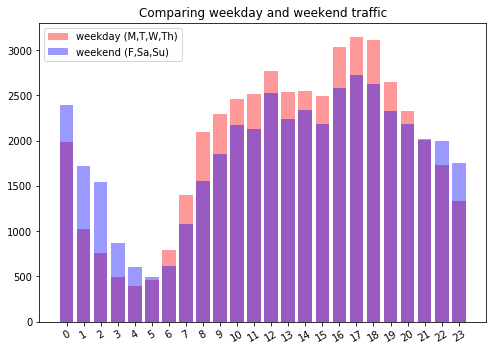

In [29]:
weekdays = crime_data.loc[crime_data.DAY_OF_WEEK.isin([ 'Monday', 'Tuesday', 'Wednesday', 'Thursday'])]
weekends = crime_data.loc[crime_data.DAY_OF_WEEK.isin(['Friday', 'Saturday','Sunday'])]

weekday_hours = weekdays.HOUR.value_counts() #count accidents for each hour
weekend_hours = weekends.HOUR.value_counts()

weekday_hours = weekday_hours/4 #normalize
weekend_hours = weekend_hours/3

y_pos = np.arange(len(weekday_hours)) #reindex
weekday_hours = weekday_hours.reindex(index=y_pos)
weekend_hours = weekend_hours.reindex(index=y_pos)

fig, ax = plt.subplots(figsize=(8, 5.5)) #plot
plt.bar(y_pos, weekday_hours.values, color='r', align='center', alpha=0.4) #plot weekdays
plt.bar(y_pos, weekend_hours, color='b', align='center', alpha=0.4) #plot weekends
plt.xticks(y_pos, weekday_hours.keys(), rotation=30)
plt.legend(['weekday (M,T,W,Th)','weekend (F,Sa,Su)'])
plt.title('Comparing weekday and weekend traffic')
ax.set_facecolor('w')

In [7]:
vehicle_crimes.OFFENSE_CODE.value_counts()

3831    16323
3802     6557
3803     5131
3801     2925
3820     1656
3830     1286
3810      916
3805      766
3807      732
3811      426
3821      414
Name: OFFENSE_CODE, dtype: int64

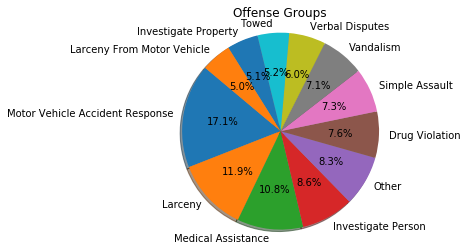

In [23]:
offense_group_counts = crime_data['OFFENSE_CODE_GROUP'].value_counts()

offense_groups = offense_group_counts[offense_group_counts > 10000].keys()
counts = offense_group_counts[offense_group_counts > 10000].values

plt.pie(counts, labels=offense_groups,autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Offense Groups')

plt.axis('equal')
plt.show()

In [114]:
x = crime_data['OFFENSE_CODE_GROUP'].value_counts()
print(x[1:50])

Larceny                             25935
Medical Assistance                  23540
Investigate Person                  18750
Other                               18075
Drug Violation                      16548
Simple Assault                      15826
Vandalism                           15415
Verbal Disputes                     13099
Towed                               11287
Investigate Property                11124
Larceny From Motor Vehicle          10847
Property Lost                        9751
Warrant Arrests                      8407
Aggravated Assault                   7807
Violations                           6095
Fraud                                5829
Residential Burglary                 5606
Missing Person Located               4958
Auto Theft                           4851
Robbery                              4624
Harassment                           4007
Property Found                       3925
Missing Person Reported              3797
Confidence Games                  

# Abstract

## Compare crime in each district

track only a subset to make the graphs readable

